# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hashlib

# Day 1

In [6]:
# day 1 part 1
up = np.loadtxt("input1.txt", dtype='str', delimiter='(').size
down = np.loadtxt("input1.txt", dtype='str', delimiter=')').size

print("Part 1: ", up-down)

Part 1:  138


Part 2:  1771


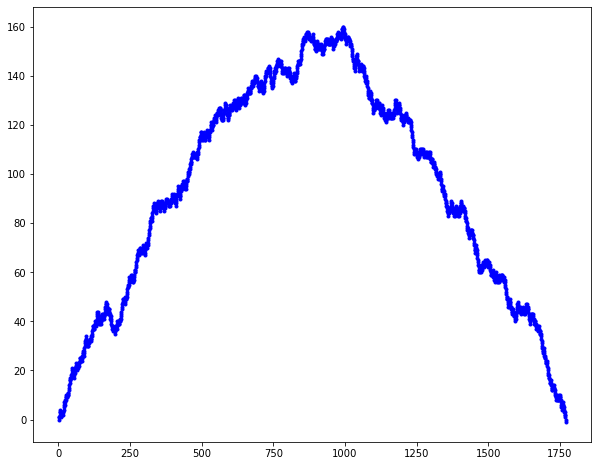

In [14]:
# day 1 part 2
data = str(np.loadtxt("input1.txt", dtype='str'))

index = 0
position = 0
plt.figure(figsize=(10,8))

while position >= 0:
    if data[index] == '(':
        position += 1
    else:
        position -= 1
    index += 1
    plt.plot(index,position,'b.')

print("Part 2: ", index)
plt.show()

# Day 2

In [29]:
# day 2 part 1
data = np.loadtxt("input2.txt", delimiter='x', dtype='int')

area = np.zeros((data.size,3))

area1 = data[:,0]*data[:,1]
area2 = data[:,0]*data[:,2]
area3 = data[:,1]*data[:,2]

result = np.sum(np.min([area1,area2,area3],axis=0))

result += 2*np.sum(area1)
result += 2*np.sum(area2)
result += 2*np.sum(area3)

print("Part 1: ", result)

# part 2
result2 = np.sum(data[:,0]*data[:,1]*data[:,2]) # ribbon for bow

result2 += np.sum(2*(np.sum(data,axis=1) - np.max(data,axis=1)))

print("Part 2: ", result2)

Part 1:  1598415
Part 2:  3812909


# Day 3

In [12]:
# day 3 part 1
#initialise coordinates
x = 0
y = 0

# read santa's instructions
input = str(np.genfromtxt("input3.txt", dtype='str'))

# initialise set of houses visited
houses = {(0,0)}

for instruction in input:
    # update position
    x += (instruction == '>')
    x -= (instruction == '<')
    y += (instruction == '^')
    y -= (instruction == 'v')
    houses.add((x,y))

print("Part 1: ", len(houses))

Part 1:  2565


In [18]:
# day 3 part 2
#initialise coordinates
x1 = 0
y1 = 0
x2 = 0
y2 = 0

# read santa's instructions
input = str(np.genfromtxt("./input3.txt", dtype='str'))

# initialise set of houses visited
houses = {(0,0)}

santa = True

for instruction in input:
    # update position
    if santa:
        x1 += (instruction == '>')
        x1 -= (instruction == '<')
        y1 += (instruction == '^')
        y1 -= (instruction == 'v')
        houses.add((x1,y1))
        santa = not santa
    else:
        x2 += (instruction == '>')
        x2 -= (instruction == '<')
        y2 += (instruction == '^')
        y2 -= (instruction == 'v')
        houses.add((x2,y2))
        santa = not santa

print("Part 2: ", len(houses))

Part 2:  2639


# Day 4

In [ ]:
# day 4
input = "yzbqklnj"

result1 = 1

while True:
    if hashlib.md5((input+str(result1)).encode()).hexdigest()[:5] == '00000':
        break
    else:
        result1 += 1

print("Part 1: ", result1)

In [27]:
# day 4
input = "yzbqklnj"

result2 = 1

while True:
    if hashlib.md5((input+str(result2)).encode()).hexdigest()[:6] == '000000':
        break
    else:
        result2 += 1

print("Part 2: ", result2)

Part 2:  9962624


# Day 5

In [56]:
# day 5 part 1
input = np.genfromtxt("input5.txt", dtype='str')
data = np.array(list(map(list,input))).astype('str')

# only consider strings with at least one repeating char
nice_strings = np.sum(data[:,:-1] == data[:,1:], axis=1).astype(bool)

# dont consider strings with 'ab, 'cd', 'pq' or 'xy
for i in np.arange(len(input)):
    nice_strings[i] = nice_strings[i] and not ("ab" in input[i] or "cd" in input[i] or "pq" in input[i] or "xy" in input[i])
    nice_strings[i] = nice_strings[i] and ((input[i].count('a') + input[i].count('e') + input[i].count('i') + input[i].count('o') + input[i].count('u')) > 2)

print("Part 1: ", np.sum(nice_strings))

Part 1:  236


In [77]:
def check_two_letter_repetition(line):
    for i in range(len(line)-3):
        test = line[i:i+2]
        if test in line[i+2:]:
            return True
    else:
        return False

In [78]:
# day 5 part 2
input = np.genfromtxt("input5.txt", dtype='str')
data = np.array(list(map(list,input))).astype('str')

result_2 = 0

# only consider strings with one letter which repeats with exactly one letter between them
nice_strings = np.sum(data[:,:-2] == data[:,2:], axis=1).astype(bool)

# dont consider strings with 'ab, 'cd', 'pq' or 'xy
for line in input[nice_strings]:
    result_2 += check_two_letter_repetition(line)

print("Part 1: ", result_2)

Part 1:  51


# Day 6

In [ ]:
# day 6
